In [189]:
!pip install pyecharts  
!pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


1. Firstly, import some necessary libraries for this project, including: Data processing libraries: pandas, numpy; Plotting libraries: matplotlib, pycharts; Model training and data prediction libraries: train_test_split and LinearRegression from scikit-learn

2. Read the data file "Guangzhou Enrollment.csv", convert it to a dataframe format, and view some information

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecharts.charts import Bar,Line,Page,Pie,HeatMap
from pyecharts.globals import ThemeType
from pyecharts.charts import EffectScatter
from pyecharts.globals import SymbolType
from pyecharts import options as opts
from pyecharts.charts import Map,Grid
from pyecharts.charts import Timeline
from pyecharts.datasets import register_url
from pyecharts.render import make_snapshot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 读取 Excel 文件
excel_file = "广州入学.xlsx"
df = pd.read_excel(excel_file)

df.head()

Unnamed: 0 Unnamed: 1    2011 Unnamed: 3 Unnamed: 4    2012 Unnamed: 6  \
0        NaN        NaN    学龄儿童   已入学人数(人)        入学率    学龄儿童   已入学人数(人)   
1        广州市  Guangzhou  784041     784041        100  785938     785938   
2        深圳市   Shenzhen  624730     624730        100  661183     661183   
3        珠海市     Zhuhai  116066     115745       99.7  119043     118944   
4        汕头市    Shantou  497129     497129        100  455153     455153   

  Unnamed: 7    2013 Unnamed: 9  ... Unnamed: 28     2020 Unnamed: 30  \
0        入学率    学龄儿童   已入学人数(人)  ...         入学率     学龄儿童    已入学人数(人)   
1        100  834764     834219  ...         100  1108365     1108365   
2        100  714656     714656  ...         100  1070241     1070241   
3       99.9  124032     123764  ...         100   181648      181648   
4        100  447813     447813  ...         100   553800      553800   

  Unnamed: 31     2021 Unnamed: 33 Unnamed: 34     2022 Unnamed: 36  \
0         入学率     学龄儿童    已入学人数(人)         入学率     学龄儿童    已入学人数(人)   
1         100  1146179     1146179         100  1183978     1183978   
2         100  1108367     1108367         100  1143995     1143995   
3         100   189753      189753         100   197743      197743   
4         100   561324      561324         100   557060      557060   

  Unnamed: 37  
0         入学率  
1         100  
2         100  
3         100  
4         100  

[5 rows x 38 columns]

3. Based on the sum data, analyze the trend of the total number of enrollment in Guangdong Province from 2011 to 2022, and plot it in the form of a bar chart:
    It can be seen that except for a decrease in school-age children and enrollment from 2011 to 2012, the numbers for other years show an increasing trend, with the increase slowing in recent years.
    
4. Based on the sum data, analyze the trend of enrollment rate in Guangdong Province from 2011 to 2022, and plot it in the form of a line chart:
    It can be seen that the enrollment rate has always maintained at a very high level (over 99.9%), and shows an overall upward trend, with occasional decreases.

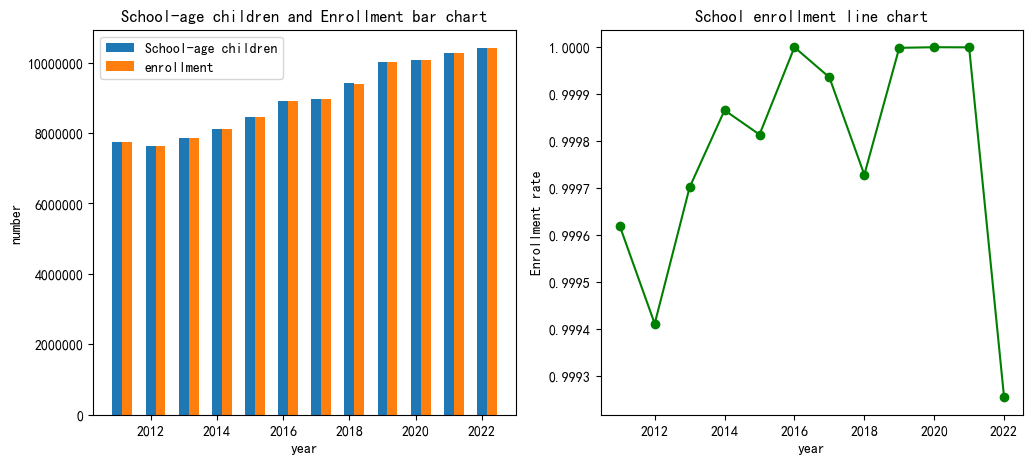

In [182]:
#按市区分

#得到市区的集合
city_data = df.iloc[1:23,0]
#城市的英文名称
city_data_en = df.iloc[1:23,1]
# print(city_data_en)
# print(city_data)
# 区分开学龄儿童，入学人数，入学率的数据
xlet = df.columns[df.iloc[0] == '学龄儿童']
rxrs = df.columns[df.iloc[0] == '已入学人数(人)']
rxl = df.columns[df.iloc[0] == '入学率']

# 获取这些值
xlet_data = df.loc[1:22,xlet]
rxrs_data = df.loc[1:22,rxrs]
rxl_data = df.loc[1:22,rxl]
year_data = np.arange(2011,2023)
# print(x)
#求广州市从2011到2022年的总数据
#学龄儿童
xlet_sum = xlet_data.sum()
#已入学人数
rxrs_sum = rxrs_data.sum()
# print(xlet_sum)
rxrs_sum = pd.Series(rxrs_sum.values, index=xlet_sum.index)
# print(rxrs_sum)
#入学率
rxl_sum = rxrs_sum / xlet_sum
# print(rxl_sum)

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用中文黑体
# 创建画布和子图
fig, axs = plt.subplots(1, 2, figsize=(12, 5))


axs[0].bar(year_data, xlet_sum, 0.3,label='School-age children')#label为柱状图标签
axs[0].bar(year_data+0.3, rxrs_sum, 0.3,label='enrollment')#两个柱状条相邻，x坐标要加上0.3
axs[0].set_xlabel("year")
axs[0].set_ylabel("number")
axs[0].ticklabel_format(axis='y', style='plain')
axs[0].legend()  #显示上面的label'
axs[0].set_title('School-age children and Enrollment bar chart')

axs[1].plot(year_data, rxl_sum, marker='o', color='green')
axs[1].set_xlabel('year')
axs[1].set_ylabel('Enrollment rate')
axs[1].set_title('School enrollment line chart')

plt.show()


5. Observe the distribution of actual enrollment in various cities of Guangdong Province:
    Extract the enrollment numbers of each city for each year through data processing, and plot the Guangdong province map with the timeline to create a dynamic effect. It can be seen that the distribution of enrolled population in Guangdong Province is uneven, concentrated in Guangzhou, Shenzhen and other places, while the enrollment in Shaoguan, Meizhou, Heyuan, Yangjiang and other large areas is relatively small; and changes little over time.

In [183]:
# 城市数据

# 提取城市和人数
cities = list(city_data)
cities_en = list(city_data_en)
# 创建时间轴
timeline = Timeline(init_opts=opts.InitOpts(width="900px", height="600px"))
# 处理NaN值
df = df.fillna(0)
# 将DataFrame转换成列表，方便后续处理
data_list = df.values.tolist()
data = df.iloc[0:23,2:]
# print(data)
indicator = 'Number of enrollment in Guangdong Province'
#英文名称地址映射
namemap = {
    '广州市': 'Guangzhou',
    '深圳市': 'Shenzhen',
    '珠海市': 'Zhuhai',
    '汕头市': 'Shantou',
    '韶关市': 'Shaoguan',
    '佛山市': 'Foshan',
    '江门市': 'Jiangmen',
    '湛江市': 'Zhanjiang',
    '茂名市': 'Maoming',
    '肇庆市': 'Zhaoqing',
    '惠州市': 'Huizhou',
    '梅州市': 'Meizhou',
    '汕尾市': 'Shanwei',
    '河源市': 'Heyuan',
    '阳江市': 'Yangjiang',
    '清远市': 'Qingyuan',
    '东莞市': 'Dongguan',
    '中山市': 'Zhongshan',
    '潮州市': 'Chaozhou',
    '揭阳市': 'Jieyang',
    '云浮市': 'Yunfu',
          }

# 遍历每一年的数据
for year in range(2011, 2023):
    # 提取当前年份的数据
    column_index = data.columns.get_loc(str(year))  # 获取 year 列的位置索引
    year_data = data.iloc[1:, column_index + 1]  # 获取下一列数据
    year_data = year_data.tolist()
    # 绘制地图
    map_chart = (
        Map()
        .add("enrollment", [list(z) for z in zip(cities_en, year_data)], "广东",label_opts=opts.LabelOpts(
            is_show=True,#不想显示名称改为False
            position="top", 
            font_size=12,  # 调整字体大小  
            ),
        name_map = namemap)
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"{indicator} - {year}"),
            legend_opts=opts.LegendOpts(is_show=False),
           visualmap_opts=opts.VisualMapOpts(
                max_=max(year_data),
                is_piecewise=True,
                precision=0,  # 设置为0，使范围的不同区间取整数
            ),
            
        )
    )
    # 添加当前年份的地图到时间轴
    timeline.add(map_chart, f"{year}")
# 渲染地图
timeline.render_notebook()

6. Specifically analyze the changes of school-age children and enrollment in various cities from 2011 to 2022:
    Draw histograms with the timeline based on the data obtained above to see that Guangzhou and Shenzhen lead far ahead in terms of school-age children and enrollment in Guangdong Province, followed by Dongguan, Zhanjiang, Maoming, Foshan and others, with relatively few in Zhuhai, Shaoguan, Heyuan and other places; and over time, Shenzhen increases more greatly while increases are relatively small in cities like Jieyang and Zhanjiang.。

In [184]:
timeline = (
    Timeline(init_opts=opts.InitOpts(width="950px",height="600px"))
)

# 循环添加每个时间点的柱状图
for year in range(2011, 2023):
    # 提取当前年份的数据
    column_index = data.columns.get_loc(str(year))  # 获取 year 列的位置索引
    xlet_data = data.iloc[1:, column_index]
    rxrs_data = data.iloc[1:, column_index + 1]  # 获取下一列数据

    bar = (
        Bar(init_opts=opts.InitOpts(width="950px",height="400px"))
        .add_xaxis(cities_en)
        .add_yaxis('School-age children', xlet_data.tolist())
        .extend_axis(yaxis=opts.AxisOpts(name='enrollment', type_='value'))
        .add_yaxis(
            'enrollment',
            rxrs_data.tolist(),
            yaxis_index=1,  # 使用第二个 Y 轴
            label_opts=opts.LabelOpts(is_show=False),  # 隐藏标签，可根据需要自行调整
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"School-age children and Enrollment bar chart - {year}"),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-45)),
             legend_opts=opts.LegendOpts(pos_right="10%", pos_top="10%"),
        )
    )
    grid = (
    Grid(init_opts=opts.InitOpts(width="1200px", height="800px"))
    .add(
        bar, grid_opts=opts.GridOpts(pos_bottom="15%"), is_control_axis_index=True
    )
    )
    timeline.add(grid, f'{year}')


timeline.render_notebook()

7. Analysis of enrollment rates in various cities:
    Use the same method as above to draw line charts of changes in enrollment rates in various cities. It can be seen that the enrollment rates of most cities remain at 100%, with occasional slight declines in some cities; and due to data collection issues, it can be seen that there was an abnormal situation of enrollment exceeding school-age children in Jieyang City in 2022; since 2017, after Shunde City changed from a city-level unit to a district of Foshan City, its enrollment rate dropped to 0% in the drawn figures.

In [185]:
# 创建时间轴
timeline = Timeline()

for year in range(2011, 2023):
    column_index = data.columns.get_loc(str(year))  # 获取 year 列的位置索引
    rxl_data = data.iloc[1:, column_index + 2]  # 获取下两列数据
    line = (
        Line()
        .add_xaxis(cities_en)
        .add_yaxis("Data",rxl_data)
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"School enrollment line chart - {year}"),
            legend_opts=opts.LegendOpts(is_show=False),
            xaxis_opts=opts.AxisOpts(type_="category"),
            yaxis_opts=opts.AxisOpts(type_="value", min_=90, max_=110),  # 设置 y 轴范围
        )
    )
    
    # Add the Line chart to the Timeline
    timeline.add(line, f"{year}")
timeline.render_notebook()

8. Analyze enrollment in different regions:
    Guangdong Province can be divided into four major regions: Pearl River Delta, East Wing, West Wing and Mountainous Areas. Therefore, using a stacked graph can more intuitively show the enrollment proportions of the four regions over time, as shown above. It can be seen that the enrollment in the Pearl River Delta region has always accounted for a relatively large proportion, while the proportions of the other three regions are roughly similar.

In [186]:
#按经济区域划分

#得到区域的集合
area_data = df.iloc[24:,0]
# print(area_data)
# print(df)
# 提取珠三角的行
zsj_data = df[df["Unnamed: 0"] == "珠三角"]
# 提取东翼的行
dy_data = df[df["Unnamed: 0"] == "东翼"]
# 提取西翼的行
xy_data = df[df["Unnamed: 0"] == "西翼"]
# 提取山区的行
sq_data = df[df["Unnamed: 0"] == "山区"]

# 提取入学人数的列名
year_columns = [str(year) for year in range(2011, 2023)]  
# 初始化存储入学人数的列表
zsj_list = []
dy_list = []
xy_list = []
sq_list = []

# 遍历每一年的列名，提取对应的入学人数
for year_column in year_columns:
    z = zsj_data[year_column].values[0]
    d = dy_data[year_column].values[0]
    x = xy_data[year_column].values[0]
    s = sq_data[year_column].values[0]
    zsj_list.append(z)
    dy_list.append(d)
    xy_list.append(x)
    sq_list.append(s)
    
# print(zsj_list)
# print(dy_list)
# print(xy_list)
# print(sq_list)
# 创建 Bar 实例
bar = (
    Bar()
    .add_xaxis(list(map(str, np.arange(2011, 2023))))
    .add_yaxis("Pearl River Delta", zsj_list, stack="stack1")
    .add_yaxis("Eastern Region", dy_list, stack="stack1")
    .add_yaxis("Western Region", xy_list, stack="stack1")
    .add_yaxis("Mountainous Region", sq_list, stack="stack1")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Stack of enrollments by region"),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(type_="value"),
        toolbox_opts=opts.ToolboxOpts(),
        legend_opts=opts.LegendOpts(pos_right="10%", pos_top="12%"),
    )
)

bar.render_notebook()

9. To more intuitively show the proportions of different regions, draw a dynamic pie chart with a timeline to directly see how the proportions of different regions change over time:
    The proportion of the Pearl River Delta shows a continuous upward trend and has exceeded 50% since 2013; the East Wing decreases slightly; the West Wing first increases and then decreases; while the Mountainous Areas change little.

In [187]:
years = list(range(2011, 2023))

# 创建时间轴
timeline = Timeline()
for year_index, year in enumerate(years):
    # 创建饼图
    pie = (
        Pie()
        .add(
            series_name="",
            data_pair=[("Pearl River Delta", zsj_list[year_index]), ("Eastern Region", dy_list[year_index]),
                       ("Western Region", xy_list[year_index]), ("Mountainous Region", sq_list[year_index])],
            radius=["20%", "75%"],
            center=["50%", "50%"],
            rosetype="radius",
            label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=10),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"Enrollment distribution - {year}"),
            legend_opts=opts.LegendOpts(
                orient="vertical",
                pos_top="15%",
                pos_left="2%",
                item_height=12,
                item_width=12,
            ),
        )
    )
    timeline.add(pie, f"{year}")

# 渲染时间轴
timeline.render_notebook()

10. Drawing a heat map can more intuitively show the distribution and changes of enrollment over time, where brighter colors represent higher numbers and darker colors represent lower numbers. It can be seen that enrollment in the Pearl River Delta continues to increase; the Mountainous Areas are generally at a lower level for most of the time, with numbers close to the East and West Wings in 2016, 2017, 2020, 2021 and 2022.

In [188]:
regions = ["Pearl River Delta", "Eastern Region", "Western Region", "Mountainous Region"]
years = list(range(2011, 2023))
data = [
    zsj_list,
    dy_list,
    xy_list,
    sq_list
]

heatmap_data = []
for i, region in enumerate(regions):
    for j, year in enumerate(years):
        heatmap_data.append([j, i, data[i][j]])

heatmap_chart = (
    HeatMap()
    .add_xaxis(years)
    .add_yaxis(
        "HeatMap",
        regions,
        heatmap_data,
        label_opts=opts.LabelOpts(is_show=True, position="inside"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Heat map of enrollment"),
        legend_opts=opts.LegendOpts(is_show=False),
        visualmap_opts=opts.VisualMapOpts(
            min_=1000000,
            max_=6000000,
           is_show=False
        ),
    )
)
grid = (
    Grid(init_opts=opts.InitOpts(width="980px", height="600px"))
    .add(
        heatmap_chart, grid_opts=opts.GridOpts(pos_left="15%"), is_control_axis_index=True
    )
)
grid.render_notebook()

11. Analysis of average enrollment in different regions:
    After data processing, the average annual enrollments from these years are obtained for each region, with the Pearl River Delta having the most at an average of 4,733,800 people per year, far ahead of the other three regions, among which the Mountainous Areas have the fewest at 1,268,372 people. The East and West Wings are not much different.

In [189]:
zsj_avg =  int(round(np.mean(zsj_list)))
dy_avg =  int(round(np.mean(dy_list)))
xy_avg =  int(round(np.mean(xy_list)))
sq_avg =  int(round(np.mean(sq_list)))

# 平均每年出生人数的涟漪散点图
scatter = (
    EffectScatter()
    .add_xaxis(["Pearl River Delta", "Eastern Region", "Western Region", "Mountainous Region"])
    .add_yaxis("Average number of births per year", [zsj_avg, dy_avg, xy_avg, sq_avg], symbol_size=20,symbol=SymbolType.ARROW)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
    .set_global_opts(title_opts=opts.TitleOpts(title="Scatter chart of the ripples in average annual enrollment"),
                    legend_opts=opts.LegendOpts(is_show=False),)
)

# 渲染图表
scatter.render_notebook()

Data prediction part:
12. First, process the data. Since Shunde City has been removed as an administrative division, it is not necessary to make predictions for it, so delete its information from the dataframe and cities list. Also, because the model needs to be trained on a two-dimensional matrix, some necessary dimensional transformations are performed.
13. Take Guangzhou as an example, view the data distribution scatter plot, which shows enrollment numbers basically follow a linear distribution and a continuing upward trend; thus the fitting straight line can be drawn.

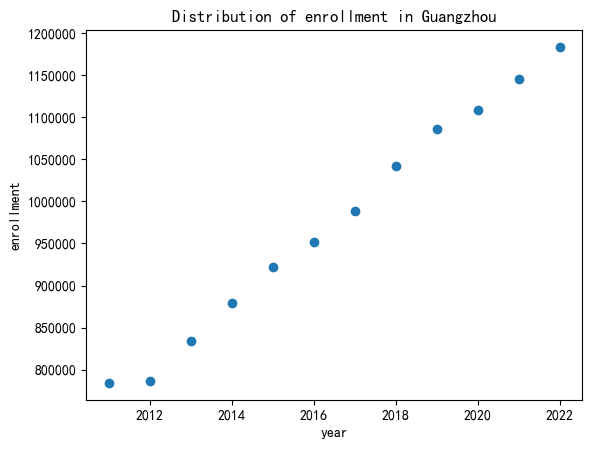

In [190]:
years = np.array(years)
if '顺德市' in cities:
    cities.remove('顺德市')
if 'Shunde' in cities_en:
    cities_en.remove('Shunde')
# 升维，
years = years.reshape(-1, 1)
# print(years)
#因为顺德市已取消区划，所以不需要预测
# 去掉顺德市的数据
df = df.drop(6)
# print(df)

c_data = df[df['Unnamed: 0'] == '广州市']
    # 选取入学人数和入学率的列，以及年份列
selected_columns = df.columns[3::3]
gz_data = c_data[selected_columns] # 入学人数
# print(gz_data)
# 绘制散点图
plt.scatter(range(2011, 2023), gz_data)

# 设置图形标题和轴标签
plt.title('Distribution of enrollment in Guangzhou')
plt.xlabel('year')
plt.ylabel('enrollment')
plt.ticklabel_format(axis='y', style='plain')
# 显示图形
plt.show()


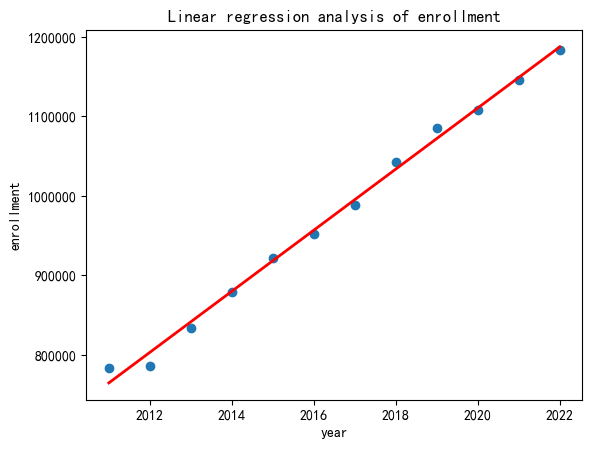

In [191]:
years = np.array(list(range(2011, 2023)))
years = years.reshape(-1,1)
values = gz_data.values
values = values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(years, values)
# 预测值
predictions = regressor.predict(years.reshape(-1, 1))
plt.scatter(range(2011, 2023), gz_data)
plt.plot(years, predictions, color='red', linewidth=2)

# 设置图形标题和轴标签
plt.title('Linear regression analysis of enrollment')
plt.xlabel('year')
plt.ylabel('enrollment')
plt.ticklabel_format(axis='y', style='plain')
# 显示图形
plt.show()

14. Based on the fitted curve, predict next year's enrollment in Guangzhou to be 1,225,877, and add the prediction result to the original plot.

2023 predict 1225877


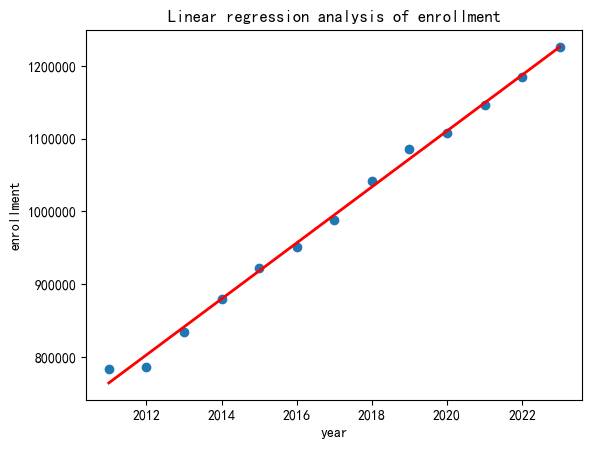

In [192]:
prediction = int(np.round(regressor.predict([[2023]])))
print('2023 predict '+str(prediction))

years = np.array(list(range(2011, 2024)))
predictions = regressor.predict(years.reshape(-1, 1))
values = gz_data.values
values=np.append(values,prediction)
# print(values)
plt.scatter(range(2011, 2024), values)
# print(years)
# print(predictions)
plt.plot(years, predictions, color='red', linewidth=2)

# 设置图形标题和轴标签
plt.title('Linear regression analysis of enrollment')
plt.xlabel('year')
plt.ylabel('enrollment')
plt.ticklabel_format(axis='y', style='plain')
# 显示图形
plt.show()

15. Predict enrollment rate by predicting school-age population based on above, take the ratio to obtain a predicted enrollment rate of around 100% for 2023 in Guangzhou, and linearly fit.

2023 predict School-age children 1225837


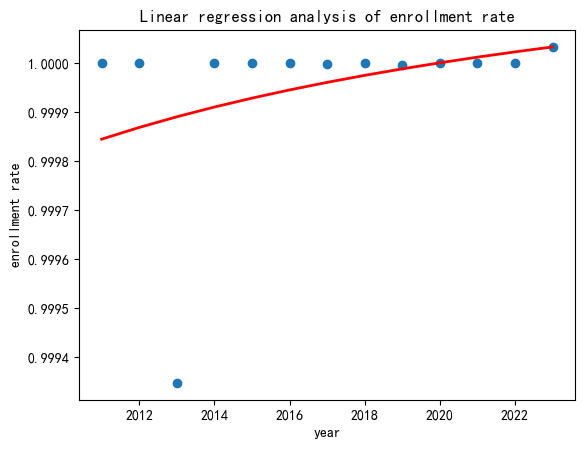

In [193]:
selected_columns = df.columns[2::3]
gz_data = c_data[selected_columns] # 学龄儿童
# print(gz_data)
years = np.array(list(range(2011, 2023)))
years = years.reshape(-1, 1)
values2 = gz_data.values
values2 = values2.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(years, values2)
prediction = int(np.round(regressor.predict([[2023]])))
print('2023 predict School-age children '+str(prediction))

years = np.array(list(range(2011, 2024)))
predictions2 = regressor.predict(years.reshape(-1, 1))
values2 = gz_data.values
values2=np.append(values2,prediction)
# print(values)
# print(values2)
result = values/values2 #求入学率
# print(result)
pre_result = predictions/predictions2

plt.scatter(range(2011, 2024), result)
plt.plot(years, pre_result, color='red', linewidth=2,)

# 设置图形标题和轴标签
plt.ticklabel_format(axis='y', style='plain')
plt.title('Linear regression analysis of enrollment rate')
plt.xlabel('year')
plt.ylabel('enrollment rate')

# 显示图形
plt.show()

16. To avoid accidents, analyze another city He yuan as an example, to analyze He yuan's enrollment numbers and rates.

Projected enrollment in Heyuan by 2023: 296527
Forecast school enrollment rate of Heyuan City in 2023: 100%


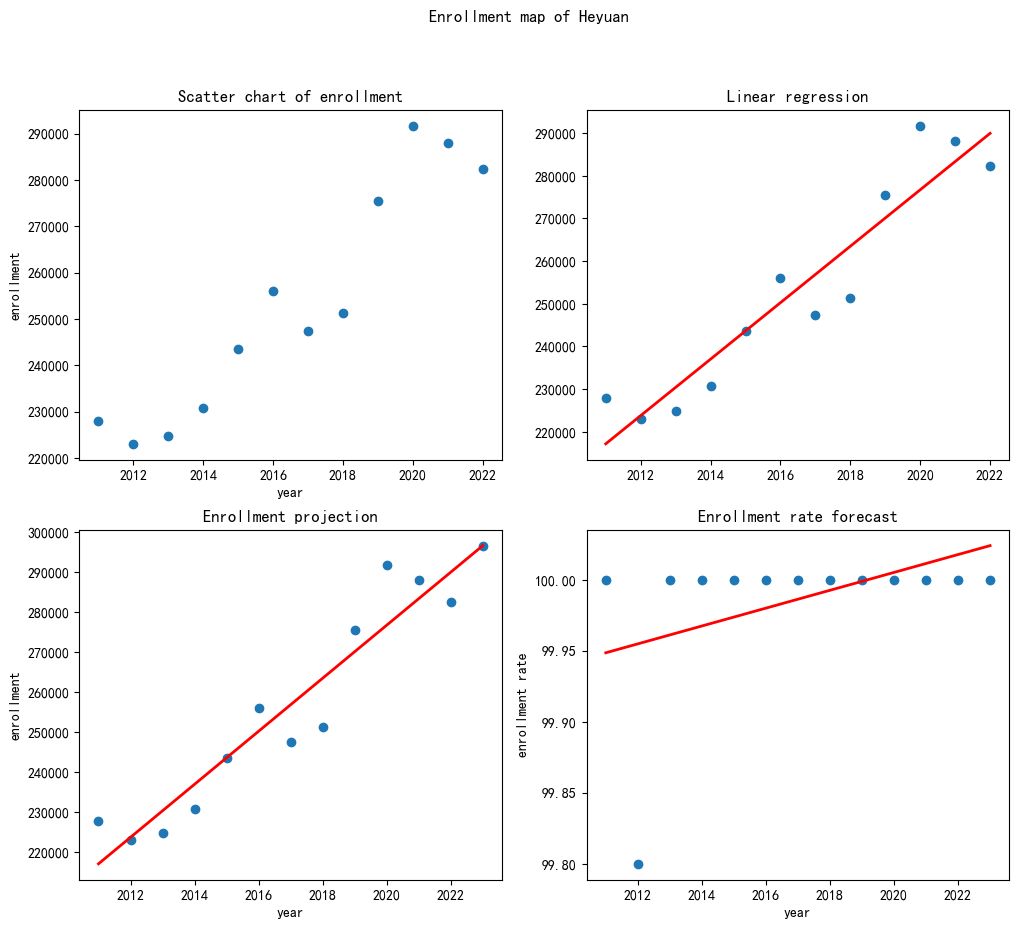

In [194]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用中文黑体
years = np.array(list(range(2011, 2023)))
years = years.reshape(-1,1)
# 创建画布和子图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Enrollment map of Heyuan')

c_data = df[df['Unnamed: 0'] == '河源市']
# 选取入学人数和的列，以及年份列
selected_columns = df.columns[3::3]
gz_data = c_data[selected_columns] # 入学人数
# print(gz_data)

axs[0,0].scatter(range(2011, 2023), gz_data)
axs[0,0].set_xlabel("year")
axs[0,0].set_ylabel("enrollment")
axs[0,0].ticklabel_format(axis='y', style='plain')
axs[0,0].set_title("Scatter chart of enrollment")
values = gz_data.values
values = values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(years, values)

# 预测值
predictions = regressor.predict(years.reshape(-1, 1))

axs[0,1].scatter(range(2011, 2023), gz_data)
axs[0,1].plot(years, predictions, color='red', linewidth=2)
axs[0,1].set_title("Linear regression")

prediction = int(np.round(regressor.predict([[2023]])))
print('Projected enrollment in Heyuan by 2023: '+str(prediction))

years = np.array(list(range(2011, 2024)))
predictions = regressor.predict(years.reshape(-1, 1))
years = years.reshape(-1, 1)
values = gz_data.values
values=np.append(values,prediction)
# print(values)
axs[1,0].scatter(range(2011, 2024), values)
# print(years)
# print(predictions)
axs[1,0].plot(years, predictions, color='red', linewidth=2)

axs[1,0].set_xlabel('year')
axs[1,0].set_ylabel('enrollment')
axs[1,0].set_title('Enrollment projection')


#选取入学率的列
selected_columns = df.columns[4::3]
gz_data = c_data[selected_columns] #入学率
#训练模型
values = gz_data.values
values = values.reshape(-1, 1)
years = np.array(list(range(2011, 2023)))
years = years.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(years, values)
years = np.array(list(range(2011, 2024)))
predictions = regressor.predict(years.reshape(-1, 1))
# print(predictions)
#预测2023年
prediction = int(np.round(regressor.predict([[2023]])))
print('Forecast school enrollment rate of Heyuan City in 2023: '+str(prediction)+'%')
values = gz_data.values
values=np.append(values,prediction)
axs[1,1].scatter(range(2011, 2024), values)
axs[1,1].plot(years, predictions, color='red', linewidth=2)
axs[1,1].set_xlabel('year')
axs[1,1].set_ylabel('enrollment rate')
axs[1,1].set_title('Enrollment rate forecast')
# 显示图形
plt.show()

17. Try building a linear regression model yourself:
The basic three steps are: writing the model initialization algorithm; writing the model fitting algorithm; writing the model prediction algorithm.

In [195]:
class LinearRegressionCustom:
    
    def __init__(self):
        # 初始化系数和截距
        self.coefficient = None #系数
        self.intercept = None  #截距

    #拟合多项式支持正则化的回归模型
    def fit(self, X, y, degree=1, alpha=0):
        # 将一维数组转换为列向量
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        # 多项式回归
        X_poly = self._polynomial_features(X, degree)
         # 正规方程求解线性回归问题，并添加正则化
         #计算正则化项。正则化是为了防止过拟合，其中alpha是正则化参数，
         #np.identity(X_poly.shape[1])生成一个单位矩阵，乘以alpha得到对角线上元素为alpha的矩阵。
        reg_term = alpha * np.identity(X_poly.shape[1])
        #使用正规方程求解线性回归问题的部分。X_poly.T表示X_poly的转置，@表示矩阵乘法。
        #计算回归系数，其中包括截距项和其他特征的系数。通过正规方程解，可以得到最优的权重值。
        self.coefficient = np.linalg.inv(X_poly.T @ X_poly + reg_term) @ X_poly.T @ y
        #提取计算得到的系数中的第一个元素作为截距项。
        self.intercept = self.coefficient[0]
        #提取计算得到的系数中除了第一个元素以外的所有元素，这是特征的系数。这一步是为了将系数存储在模型的属性中，方便后续的预测和分析。
        self.coefficient = self.coefficient[1:]

    def predict(self, X, degree=1):
        
        # 将列表转换为NumPy数组
        X = np.array(X)
        # 执行多项式特征转换
        X_poly = self._polynomial_features(X, degree)
        # 预测目标变量值
        predictions = X_poly @ np.insert(self.coefficient, 0, self.intercept)
        # 四舍五入并返回整数预测值
        return int(np.round(predictions[0]))

    #生成多项式回归模型所需的特征矩阵，其中包括截距列和原始特征的各个次幂。这样的特征矩阵可用于在高次多项式回归中拟合数据。
    def _polynomial_features(self, X, degree):
        
        # 一次多项式，返回包含截距列的矩阵
        if degree == 1:
            return np.c_[np.ones(X.shape[0]), X]
        # 高次多项式，返回包含各次幂的矩阵
        else:
            #使用列表推导式生成一个包含原始特征的各个次幂的列表。
            #range(1, degree + 1) 用于生成从1到degree的整数，然后对每个整数i，计算X的i次幂。
            polynomial_features = [X ** i for i in range(1, degree + 1)]
            #返回一个矩阵，其中第一列是全为1的截距列，后续列是原始特征的各个次幂。这是通过 np.c_ 将两个矩阵按列连接而实现的。
            return np.c_[np.ones(X.shape[0]), np.concatenate(polynomial_features, axis=1)]


In [196]:
def plot_and_model(city):
    c_data = df[df['Unnamed: 1'] == city]
    # 选取入学人数和入学率的列，以及年份列
    selected_columns = df.columns[3::3]
    r_feature = c_data[selected_columns] #特征 入学人数
    r_feature = r_feature.values
    r_feature = r_feature.reshape(-1, 1)
    selected_columns = df.columns[2::3]
    x_feature = c_data[selected_columns] #特征 学龄儿童
    x_feature = x_feature.values
    x_feature = x_feature.reshape(-1, 1)
    
    #使用自己定义的模型
    model = LinearRegressionCustom()
    # 使用 xeshape 将 years 转换为二维数组
    model.fit(years,x_feature )
    predicted = model.predict([[2023]])
    model2 = LinearRegressionCustom()
    # 使用 reshape 将 years 转换为二维数组
    model2.fit(years, r_feature)
    predicted2 = model2.predict([[2023]])
    rxl = round(predicted2/predicted*100,2)
    if(rxl>100):
        rxl=100.00
        
    return [city, predicted, predicted2, rxl]
years = np.array(list(range(2011, 2023)))
years = years.reshape(-1,1)
columns = ['City', 'School-age children', 'Enrollment', 'Enrollment rate']
forecast_results = []
for city in cities_en:
    forecast_results.append(plot_and_model(city))
forecast_df = pd.DataFrame(forecast_results, columns=columns)
print('Forecast for 2023:')
forecast_df = pd.DataFrame(forecast_results, columns=columns)
forecast_df


Forecast for 2023:


City  School-age children  Enrollment  Enrollment rate
0   Guangzhou              1225837     1225877           100.00
1    Shenzhen              1226014     1225628            99.97
2      Zhuhai               205011      205034           100.00
3     Shantou               572670      572660           100.00
4      Foshan               690167      690179           100.00
5    Shaoguan               276436      276606           100.00
6      Heyuan               296473      296527           100.00
7     Meizhou               328990      327691            99.61
8     Huizhou               681173      681312           100.00
9     Shanwei               271433      270051            99.49
10   Dongguan               898506      898506           100.00
11  Zhongshan               377412      377412           100.00
12   Jiangmen               363385      363388           100.00
13  Yangjiang               271549      271572           100.00
14  Zhanjiang               756273      756293           100.00
15    Maoming               658152      658282           100.00
16   Zhaoqing               348755      348756           100.00
17   Qingyuan               434899      435049           100.00
18   Chaozhou               204702      204702           100.00
19    Jieyang               514391      514407           100.00
20      Yunfu               230692      231176           100.00